In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
import datetime
%matplotlib inline


# read each CSV file into dataframe
jan_2018 = pd.read_csv("data/Phoenix/january-2018.csv")
february_2018 = pd.read_csv("data/Phoenix/february-2018.csv")
march_2018 = pd.read_csv("data/Phoenix/march-2018.csv")
april_2018 = pd.read_csv("data/Phoenix/april-2018.csv")
may_2018 = pd.read_csv("data/Phoenix/may-2018.csv")
june_2018 = pd.read_csv("data/Phoenix/june-2018.csv")
july_2018 = pd.read_csv("data/Phoenix/july-2018.csv")
august_2018 = pd.read_csv("data/Phoenix/august-2018.csv")
september_2018 = pd.read_csv("data/Phoenix/september-2018.csv")
october_2018 = pd.read_csv("data/Phoenix/october-2018.csv")
november_2018 = pd.read_csv("data/Phoenix/november-2018.csv")
december_2018 = pd.read_csv("data/Phoenix/december-2018.csv")

# simple way of combining the CSV file dataframes into one
# similar to Union operator in SQL
phx_ven_pay_18 = pd.concat([jan_2018,february_2018, march_2018, 
                            april_2018, may_2018, june_2018, 
                            july_2018, august_2018, september_2018,
                            october_2018, november_2018, december_2018])

In [3]:
phx_ven_pay_18.dtypes

Check/Payment Date    object
Dept. Descrptn        object
Vendor Name           object
Commitmt Item Name    object
Invoice Net Amt       object
dtype: object

In [7]:
# get the Invoice Net Amount from an object into a float64 format
# first, had to convert to type string
phx_ven_pay_18.iloc[:,4] = phx_ven_pay_18.iloc[:,4].astype(str)

# then, find/replace commas
phx_ven_pay_18.iloc[:,4] = phx_ven_pay_18.iloc[:,4].str.replace(',','')

# three vendor payments had NaN values, had to drop these before using to_numeric function below
phx_ven_pay_18.dropna(inplace=True)

# finally, used to_numeric function
phx_ven_pay_18.iloc[:,4] = pd.to_numeric(phx_ven_pay_18.iloc[:,4])

In [8]:
# this was a bit more tricky of a conversion based on the format of date
# in the past I've simply used to_datetime, without providing any paramaters other than 
# the column to convert, this time I had to specify the date format as a kwarg

phx_ven_pay_18.iloc[:,0] = pd.to_datetime(phx_ven_pay_18.iloc[:,0], format='%m/%d/%Y')

In [10]:
# date range of data
print(phx_ven_pay_18.iloc[:,0].min())
print(phx_ven_pay_18.iloc[:,0].max())

2018-01-02 00:00:00
2018-12-31 00:00:00


In [11]:
phx_ven_pay_18.head()

,Check/Payment Date,Dept. Descrptn,Vendor Name,Commitmt Item Name,Invoice Net Amt
0,2018-01-04,Human Services,1 N 10 INC,Spec Contractual Svc,1166.67
1,2018-01-04,Human Services,1 N 10 INC,Spec Contractual Svc,4166.66
2,2018-01-10,Human Services,1 N 10 INC,Spec Contractual Svc,1166.67
3,2018-01-10,Human Services,1 N 10 INC,Spec Contractual Svc,4166.66
4,2018-01-10,Human Services,1 N 10 INC,Spec Contractual Svc,1166.67


In [12]:
# how many rows are in the dataset?
phx_ven_pay_18.iloc[:,1].count()

554505

In [13]:
# create Day_of_Year column to perform time series analysis over the year
phx_ven_pay_18['Day_of_Year'] = phx_ven_pay_18['Check/Payment Date'].dt.dayofyear

In [14]:
# find top vendors based on amounts paid over the year
top_vendors_by_payment_amount = phx_ven_pay_18.groupby('Vendor Name')['Invoice Net Amt'].sum() \
    .apply(lambda x: int(x/1000000)) \
    .sort_values(ascending=False) \
    .head(20)
top_vendors_by_payment_amount

Vendor Name
US BANK TRUST NATIONAL ASSOCIATION    556
VALLEY METRO RAIL INC                 147
HUNT AUSTIN A JOINT VENTURE           142
TRANSDEV SERVICE INC                  110
HENSEL PHELPS CONSTRUCTION CO          76
REGIONAL PUBLIC TRANSPORTATION         68
ARIZONA PUBLIC SERVICE CO              47
BOMBARDIER TRANSPORTATION              40
FIRST TRANSIT INC                      37
ARIZONA QUADEL CONSULTING LLC          34
CENTRAL ARIZONA PROJECT                33
TALIS CONSTRUCTION CORPORATION         28
GILLIG LLC                             23
PCL CONSTRUCTION INC                   22
FELIX CONSTRUCTION CO                  20
SALT RIVER PROJECT                     20
NEW FLYER OF AMERICA                   18
WORLD WIDE TECHNOLOGY INC              17
COMBS CONSTRUCTION CO INC              17
MV PUBLIC TRANSPORTATION, INC          16
Name: Invoice Net Amt, dtype: int64

Text(0.5, 0, 'Payments in Millions($)')

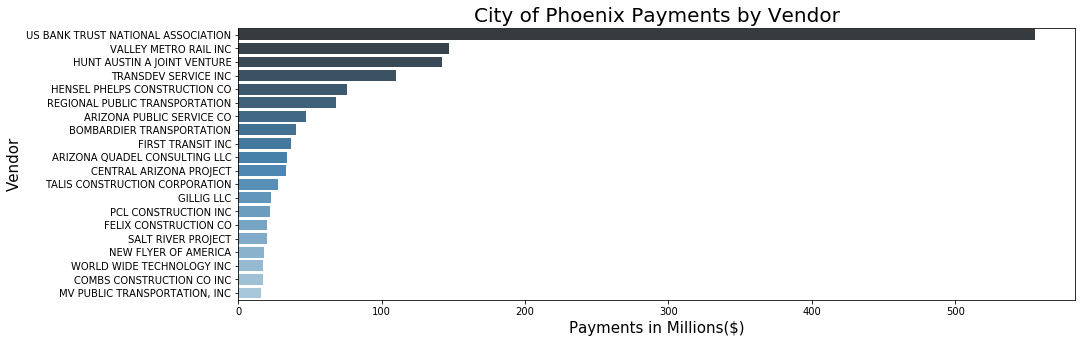

In [15]:
plt.subplots(figsize=(15,5))
sns.barplot(top_vendors_by_payment_amount.values, top_vendors_by_payment_amount.index, palette="Blues_d")
sns.set_context("notebook", font_scale=1.2)

plt.title('City of Phoenix Payments by Vendor',fontsize=20)
plt.ylabel('Vendor',fontsize=15)
plt.xlabel('Payments in Millions($)',fontsize=15)

In [16]:
# which vendors have the highest volume of payments?
high_volume_vendors = phx_ven_pay_18.groupby('Vendor Name')['Invoice Net Amt'].count() \
    .sort_values(ascending=False) \
    .head(20)
high_volume_vendors

Vendor Name
WIST OFFICE PRODUCTS CO              41883
GRAINGER                             17369
ARIZONA UNIFORM & APPAREL            17361
CREATIVE COMMUNICATIONS              13677
COURTESY CHEVROLET                   13564
WAXIE SANITARY SUPPLY                10464
STAR DISTRIBUTING CO                  9673
ARIZONA PUBLIC SERVICE CO             7798
SIX POINTS HARDWARE INC               7691
FREIGHTLINER OF ARIZONA LLC           6873
BROWNS PARTSMASTER INC                6689
MARIPOSA LANDSCAPE ARIZONA INC        5665
COMMUNITY TIRE PROS & AUTO REPAIR     5311
NAPA/GENUINE PARTS CO-PHOENIX         5182
PRUDENTIAL OVERALL SUPPLY             5006
PARTS AUTHORITY ARIZONA LLC           4992
NATIONAL FIRE CONTROL                 4789
MISSION UNIFORM SERVICES              4563
VULCAN MATERIAL CO - WESTERN D        4367
FLEETPRIDE                            4209
Name: Invoice Net Amt, dtype: int64

Text(0.5, 0, 'Count of Payments')

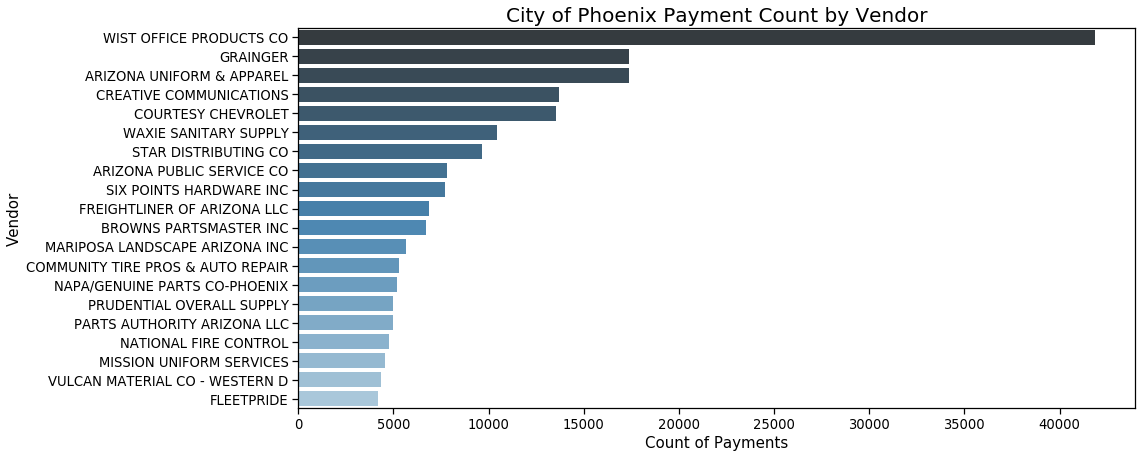

In [17]:
plt.subplots(figsize=(15,7))
sns.barplot(high_volume_vendors.values, high_volume_vendors.index, palette="Blues_d")

sns.set_context("notebook", font_scale=1.2)

plt.title('City of Phoenix Payment Count by Vendor',fontsize=20)
plt.ylabel('Vendor',fontsize=15)
plt.xlabel('Count of Payments',fontsize=15)

In [20]:
# for the above vendors with the highest volume of payments, what is the mean payment value?

# subset dataset based on series I created above to identify top vendors by volume
high_volume_vendors_data = phx_ven_pay_18[phx_ven_pay_18['Vendor Name'].str.contains('|'.join(high_volume_vendors.index))]

high_volume_vendors_data.groupby('Vendor Name')['Invoice Net Amt'].mean().sort_values(ascending=False)


Vendor Name
ARIZONA PUBLIC SERVICE COMPANY       6467.520378
ARIZONA PUBLIC SERVICE CO            6097.810935
COURTESY CHEVROLET                   1160.099771
VULCAN MATERIAL CO - WESTERN D        538.795629
FREIGHTLINER OF ARIZONA LLC           453.835786
MARIPOSA LANDSCAPE ARIZONA INC        402.908729
WAXIE SANITARY SUPPLY                 274.125940
CREATIVE COMMUNICATIONS               219.968136
GRAINGER                              174.383732
COMMUNITY TIRE PROS & AUTO REPAIR     165.781614
SIX POINTS HARDWARE INC               156.510975
BROWNS PARTSMASTER INC                133.961296
FLEETPRIDE                            110.912088
NAPA/GENUINE PARTS CO-PHOENIX          69.831098
NATIONAL FIRE CONTROL                  61.332255
ARIZONA UNIFORM & APPAREL              40.087561
WIST OFFICE PRODUCTS CO                35.259999
STAR DISTRIBUTING CO                   28.971490
MISSION UNIFORM SERVICES               27.185492
PARTS AUTHORITY ARIZONA LLC            23.997284
PRUDENTI

In [23]:
high_volume_vendors_data.head()

,Check/Payment Date,Dept. Descrptn,Vendor Name,Commitmt Item Name,Invoice Net Amt,Day_of_Year
5229,2018-01-02,Public Works,ARIZONA PUBLIC SERVICE CO,Electricity,77343.34,2
5230,2018-01-02,Neighborhood Services,ARIZONA PUBLIC SERVICE CO,Electricity,2150.98,2
5231,2018-01-02,Water Services,ARIZONA PUBLIC SERVICE CO,Electricity,18544.74,2
5232,2018-01-02,Water Services,ARIZONA PUBLIC SERVICE CO,Electricity,138253.80,2
5233,2018-01-02,Water Services,ARIZONA PUBLIC SERVICE CO,Electricity,542734.00,2


Text(0.5, 0, 'Mean Payments')

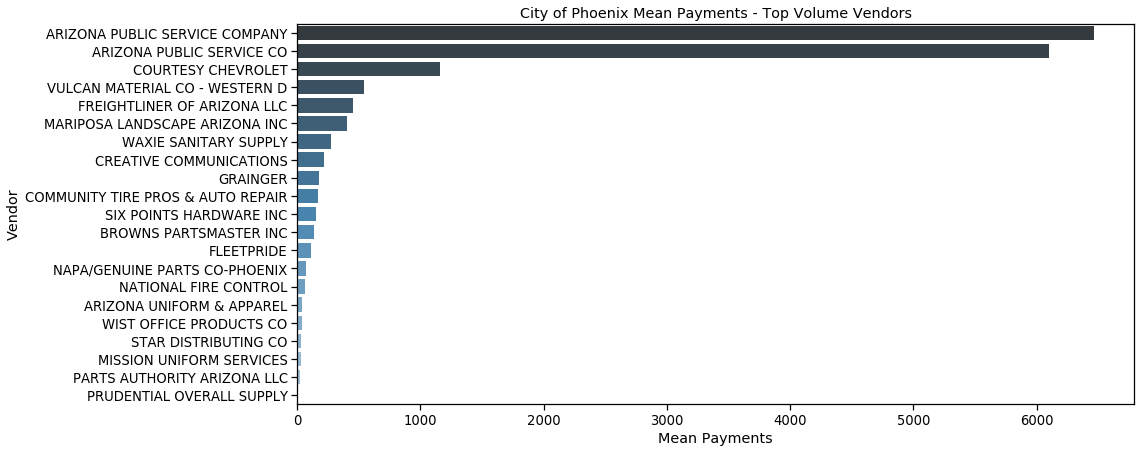

In [24]:
plt.subplots(figsize=(15,7))

sns.barplot(high_volume_vendors_data.groupby('Vendor Name')['Invoice Net Amt'].mean().sort_values(ascending=False)
.values, high_volume_vendors_data.groupby('Vendor Name')['Invoice Net Amt'].mean().sort_values(ascending=False)
.index, palette=("Blues_d"))

sns.set_context("notebook", font_scale=1.2)

plt.title('City of Phoenix Mean Payments - Top Volume Vendors')
plt.ylabel('Vendor')
plt.xlabel('Mean Payments')

#### why are there two different names for APS above?
#### why does Phoenix use multiple uniform service companies?

In [25]:
# how are payments distributed throughout the year?
payments_by_day_of_year = phx_ven_pay_18.groupby(["Day_of_Year"])["Invoice Net Amt"].sum()
payments_by_day_of_year.head()

Day_of_Year
2    5836279.54
3    5161925.60
4    7634733.70
5    6081760.12
8    6758110.19
Name: Invoice Net Amt, dtype: float64

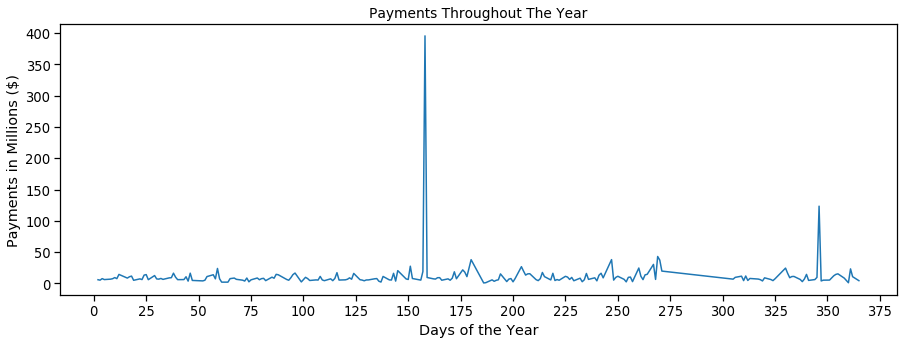

In [26]:
fig, ax = plt.subplots(figsize=(15,5))

ax = sns.lineplot(data=payments_by_day_of_year)
sns.set_context("notebook", font_scale=1.15)

plt.title('Payments Throughout The Year')
plt.ylabel('Payments in Millions ($)')
plt.xlabel('Days of the Year')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(25))


In [27]:
high_volume_vendors.head()

Vendor Name
WIST OFFICE PRODUCTS CO      41883
GRAINGER                     17369
ARIZONA UNIFORM & APPAREL    17361
CREATIVE COMMUNICATIONS      13677
COURTESY CHEVROLET           13564
Name: Invoice Net Amt, dtype: int64

In [28]:
# how are payments to high volume vendors distributed throught the year?
high_volume_vendors_data.groupby(["Day_of_Year"])["Invoice Net Amt"].sum().head()

Day_of_Year
2    2241869.29
3    1230817.27
4     399451.25
5      43988.50
8      77282.47
Name: Invoice Net Amt, dtype: float64

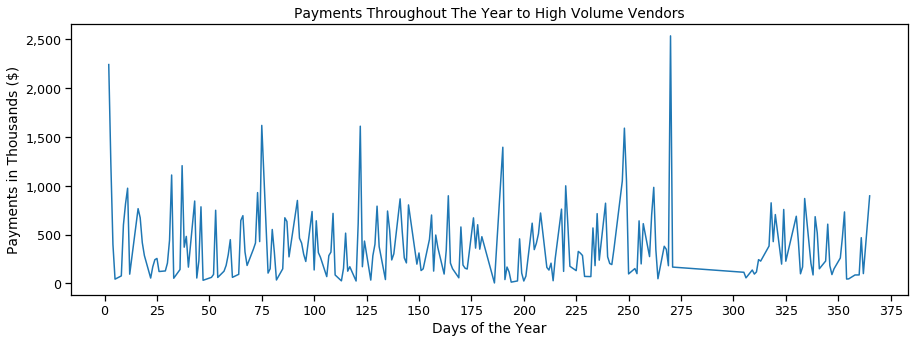

In [29]:
fig, ax = plt.subplots(figsize=(15,5))

ax = sns.lineplot(data=high_volume_vendors_data.groupby(["Day_of_Year"])["Invoice Net Amt"].sum())
sns.set_context("notebook", font_scale=1.15)

plt.title('Payments Throughout The Year to High Volume Vendors')
plt.ylabel('Payments in Thousands ($)')
plt.xlabel('Days of the Year')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(25))